# Summer Olympics Data Analysis Assignment

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("summer.csv")
df.head(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold


### 1. In how many cities Summer Olympics is held so far?

In [ ]:
print(df['City'].unique())
print("\nSummer Olympics is so far held",(len(df['Year'].unique())),"times in",(len(df['City'].unique())),"cities around the world.")

['Athens' 'Paris' 'St Louis' 'London' 'Stockholm' 'Antwerp' 'Amsterdam'
 'Los Angeles' 'Berlin' 'Helsinki' 'Melbourne / Stockholm' 'Rome' 'Tokyo'
 'Mexico' 'Munich' 'Montreal' 'Moscow' 'Seoul' 'Barcelona' 'Atlanta'
 'Sydney' 'Beijing']

Summer Olympics is so far held 27 times in 22 cities around the world.


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

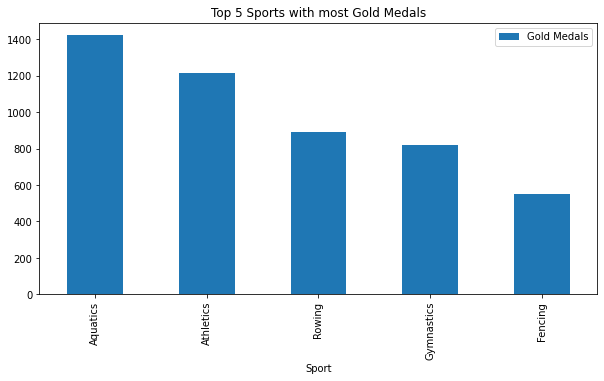

In [ ]:
df1 = pd.get_dummies(df, columns = ['Medal'])
sport = list(df1['Sport'].unique())
medal_gold = []

for i in sport:
    x = df1[df1["Sport"] == i]
    gold = x.Medal_Gold.sum()
    medal_gold.append(gold)

pd.DataFrame({"Sport": sport,
               "Gold Medals": medal_gold}).sort_values(by="Gold Medals", ascending=False).head().plot(x = "Sport", y = 'Gold Medals', title = "Top 5 Sports with most Gold Medals", kind = 'bar', figsize = (10,5))

### 3. Which sport is having most number of medals so far? (Top 5)

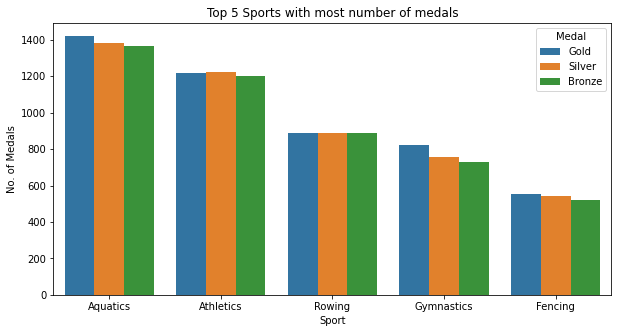

In [ ]:
plt.figure(figsize=(10, 5))
most_medals_sport = df['Sport'].value_counts().index
sns.countplot(data=df, x='Sport', hue = 'Medal', order=most_medals_sport[0:5])
plt.title('Top 5 Sports with most number of medals')
plt.xlabel('Sport')
plt.ylabel('No. of Medals');

### 4. Which player has won most number of medals? (Top 5)

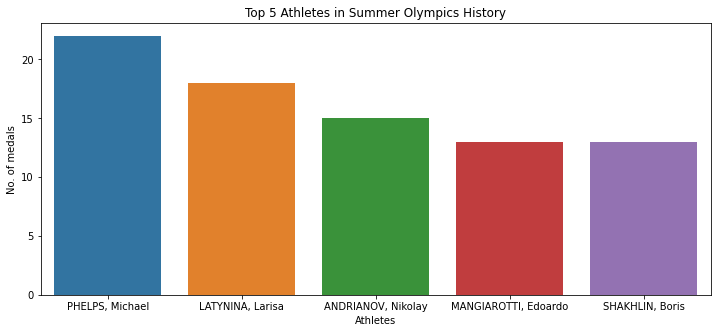

In [ ]:
most_medals = df.groupby(['Athlete']).size()
most_medals = pd.DataFrame(most_medals)
most_medals.reset_index(inplace=True)
most_medals = most_medals[most_medals[0]>6].sort_values(by= 0, ascending = False)

plt.figure(figsize=(12, 5))
sns.barplot(x='Athlete', y=0, data = most_medals[0:5])
plt.title('Top 5 Athletes in Summer Olympics History')
plt.xlabel('Athletes')
plt.ylabel('No. of medals');

### 5. Which player has won most number Gold Medals of medals? (Top 5)

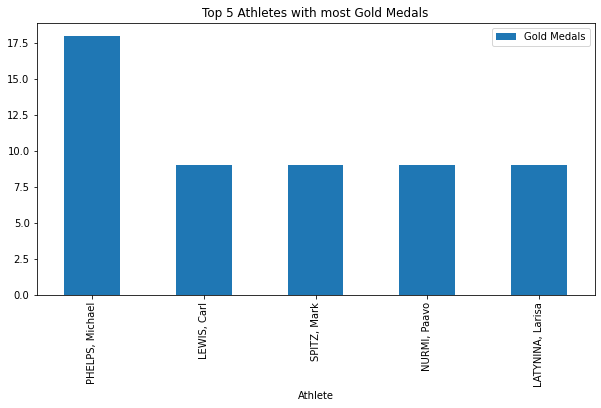

In [ ]:
df1 = pd.get_dummies(df, columns = ['Medal'])
ath = list(df1['Athlete'].unique())
medal_gold = []

for i in ath:
    x = df1[df1["Athlete"] == i]
    gold = x.Medal_Gold.sum()
    medal_gold.append(gold)

pd.DataFrame({"Athlete": ath,
               "Gold Medals": medal_gold}).sort_values(by="Gold Medals", ascending=False).head().plot(x = "Athlete", y = 'Gold Medals', title = "Top 5 Athletes with most Gold Medals", kind = 'bar', figsize = (10,5))

### 6. In which year India won first Gold Medal in Summer Olympics?

In [ ]:
Ind = df.loc[(df['Country'] == "IND") & (df['Medal'] == "Gold")].head(1)
Ind_Gold = Ind["Year"].tolist()
I = ' '.join(map(str, Ind_Gold))
print("India won its first Olympic Gold medal in",I+".")

India won its first Olympic Gold medal in 1928.


### 7. Which event is most popular in terms on number of players? (Top 5)

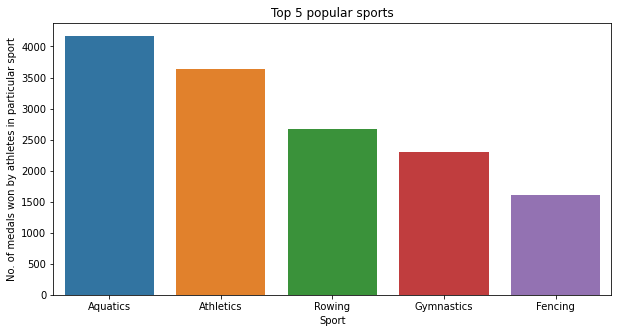

In [ ]:
plt.figure(figsize=(10, 5))
pop_sport = df['Sport'].value_counts().index
sns.countplot(data=df, x='Sport', order=pop_sport[0:5])
plt.title('Top 5 popular sports')
plt.xlabel('Sport')
plt.ylabel('No. of medals won by athletes in particular sport');

### 8. Which sport is having most female Gold Medalists? (Top 5)

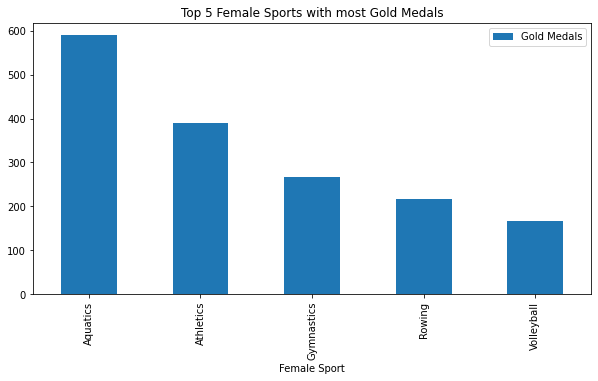

In [6]:
fem = df.loc[(df['Gender'] == "Women") & (df['Medal'] == "Gold")]
fem1 = pd.get_dummies(fem, columns = ['Medal'])
ath = list(fem1['Sport'].unique())
medal_gold = []

for i in ath:
    x = fem1[fem1["Sport"] == i]
    gold = x.Medal_Gold.sum()
    medal_gold.append(gold)

pd.DataFrame({"Female Sport": ath,
               "Gold Medals": medal_gold}).sort_values(by="Gold Medals", ascending=False).head().plot(x = "Female Sport", y = 'Gold Medals', title = "Top 5 Female Sports with most Gold Medals", kind = 'bar', figsize = (10,5))